In [47]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize
from numpy.random import choice
from numpy.lib import pad
from math import sqrt, floor, ceil

In [48]:
def load_data(file):
    return loadmat(file)

In [49]:
data = load_data('./ex3data1.mat')
X = data['X']
y = np.array(list(map(lambda a: [0] if a[0] == 10 else a, data['y'])))

print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


### 1.2 Visualizing the data

In [50]:
def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array looks like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))


def unblockshaped(arr, h, w):
    """
    Return an array of shape (h, w) where
    h * w = arr.size

    If arr is of shape (n, nrows, ncols), n sublocks of shape (nrows, ncols),
    then the returned array preserves the "physical" layout of the sublocks.
    """
    n, nrows, ncols = arr.shape
    return (arr.reshape(h//nrows, -1, nrows, ncols)
               .swapaxes(1,2)
               .reshape(h, w))

In [51]:
def pad_with_ones(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 1
    vector[-pad_width[1]:] = 1
    return vector

In [52]:
def display_data(data):
    imgs = np.array([pad(data[i].reshape(20, 20).T, 1, pad_with_ones) for i in range(len(data))])
    
    m, height, width = imgs.shape
    n_row = floor(sqrt(m))
    n_col = ceil(m/n_row)
    
    imgs = unblockshaped(imgs, n_row*imgs.shape[1], n_col*imgs.shape[2])
    
    plt.gray()
    plt.imshow(imgs)

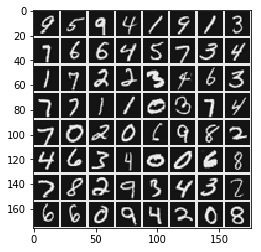

In [53]:
sample_data = X[choice(X.shape[0], 64, replace=False)]
display_data(sample_data)

### 1.3 Vectorizing Logistic Regression

In [54]:
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

In [55]:
def lr_cost_function(theta, X, y, lamb):
    m = len(y)
    hx = sigmoid(theta.dot(X.T))
    J = (-1/m)*(y.T.dot(np.log(hx)) + (1-y).T.dot(np.log(1-hx))) + (lamb/(2*m))*np.sum(np.power(theta[1:],2))
    
    return J

In [77]:
def lr_gradient(theta, X, y, lamb):
    m = len(y)
    hx = sigmoid(X.dot(theta.reshape(-1,1)))
    grad = (1/m)*(hx-y).T.dot(X) + (lamb/m)*np.c_[[0], [theta[1:]]]
    
    return grad.flatten()

### 1.4 One-vs-all Classification

In [80]:
def one_vs_all(X, y, num_labels, lamb):
    all_theta = np.zeros((num_labels, X.shape[1]))
    for i in range(len(all_theta)):
        c_y = np.array(list(map(lambda a: [1] if a[0] == i else [0], y)))

        theta = all_theta[i]
        res = minimize(lr_cost_function, theta, method='BFGS', jac=lr_gradient, args=(X,c_y,lamb), options={'disp': True})
        all_theta[i] = res.x
        
    return all_theta

In [107]:
all_theta = one_vs_all(X, y, 10, lamb=1)
print(all_theta.shape)

Optimization terminated successfully.
         Current function value: 0.025740
         Iterations: 180
         Function evaluations: 181
         Gradient evaluations: 181
Optimization terminated successfully.
         Current function value: 0.027979
         Iterations: 164
         Function evaluations: 165
         Gradient evaluations: 165
Optimization terminated successfully.
         Current function value: 0.073193
         Iterations: 224
         Function evaluations: 225
         Gradient evaluations: 225
Optimization terminated successfully.
         Current function value: 0.083248
         Iterations: 218
         Function evaluations: 219
         Gradient evaluations: 219
Optimization terminated successfully.
         Current function value: 0.053688
         Iterations: 207
         Function evaluations: 208
         Gradient evaluations: 208
Optimization terminated successfully.
         Current function value: 0.076877
         Iterations: 220
         Function ev

### 1.4.1 One-vs-all Prediction

In [108]:
def predict_one_vs_all(all_theta, X):
    return np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)

In [109]:
def evaluate(ground_truth, prediction):
    return sum(ground_truth.ravel() == prediction)/len(prediction)

In [110]:
prediction = predict_one_vs_all(all_theta, X)
evaluate(y, prediction)

0.9412

### 2.1 Model representation

In [119]:
weights = load_data('./ex3weights.mat')
theta_1 = weights['Theta1']
theta_2 = weights['Theta2']
print(theta_1.shape)
print(theta_2.shape)

(25, 401)
(10, 26)


### 2.2 Feedforward Propagation and Prediction

In [ ]:
def predict(theta_1, theta_2, X):
    eifjcchuneinkkbncnrknikikkvtufcgbfdcungghuuf